# Support Vector Machine (SVM)

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=UX0f9BNBcsY

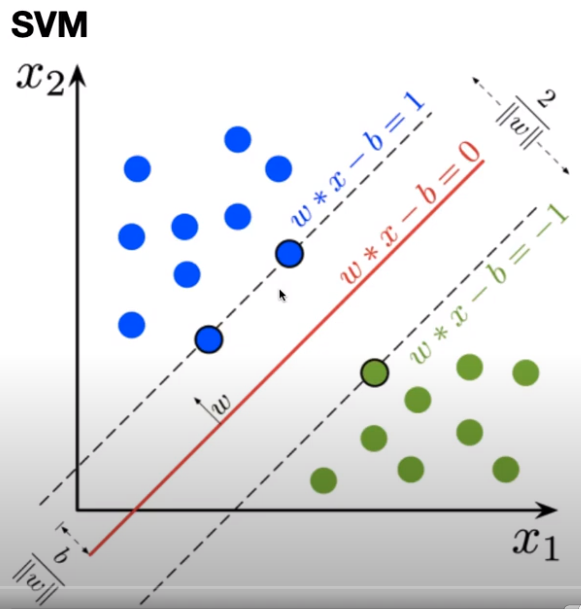

### Notes

The Support Vector Machine (SVM) is a very popular algorithm it follows the idea to use a linear model to find a linear decision boundary. A linear decision boundary is called a hyper plane that best separetes our data. Here the choice as the best hyperplane is the one that represents the largest separation or the largest margin between the two classes. We choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. The hyperplane has to satisfy this equation weights times X minus bias = 0 and we want to find the hyperplane so that the distance to both classes is maximized so we use the class plus 1 and minus 1. This distance or the margin should be maximized.

## Linear Model

$ w \cdot x - b = 0 $

$ w \cdot x_{i} - b \ge 1 \ \text{if} \ y_{i} = 1 $
$ \\ w \cdot x_{i} - b \le -1 \ \text{if} \ y_{i} = -1 $

### Notes

We use the linear model, weights times X minus bias equals 0. Then our function should also satisfy the condition that weights times X minus bias should be greater or equal than 1 for our class plus 1, so all the samples must lie on the left side of our equation $ w \cdot x - b = 1 $. All the samples of the class -1 must lie on the right side of equation $ w \cdot x - b = -1 $. 

If we put this mathematically then it must satisfy weights time X minus bias should be greater or equal than 1 for class 1 or it should be less or equal -1 for class -1.

$ y_{i}(w \cdot x_{i} - b) \ge 1 $

### Notes

If we put this in only one equation then we multiplay our linear function with the class label and this should be greater or equal 1. So this is the condition that we want to satisfy. We want to come up with the weights and the bias, to find them we use the cost function and then apply gradient descent.

## Cost Function

### Hinge Loss

$ l = max(0, 1 - y_{i}(w \cdot x_{i} - b)) $

### Notes

we use the cost function and in this case we use the hinge loss and this is defined as maximum of 0 and 1 - our condition.

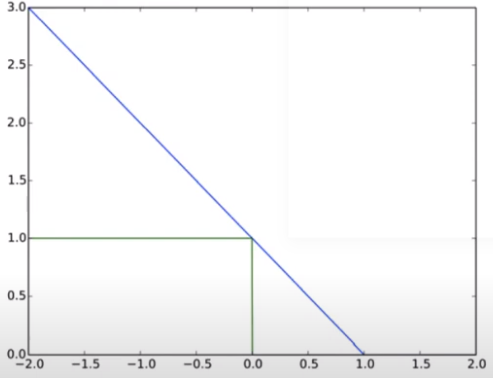



$ l = \begin{cases}
  0 & \text{if } y \cdot f(x) \ge 1, \\
  1 - y \cdot f(x), & \text{otherwise}.
\end{cases} $

### Notes

If we plot the hinge loss like in the picture above. The blue line is the hinge loss, so this is either 0 if y times f(x) is greater or equal than 1 so if they have the same sign then it's 0. So if they are correctly classified and are larger than one then our loss is 0. This means if we have a look at the image from the beginning again. If for the green class it's lies on green side then it's 0 and for blue class if it lies on blue side then it's also 0 and otherwise we heave a linear function. So the further we are away from our decision boundary line the higher is our loss and so this is one part of our cost function. The other part is that we want to maximize the margin between these two classes and the margin is defined is 2 over the magnitude of weights. This is dependent from our weight vector so we want to maximize this and therfore we want to minimize the magnitude so we add this to our cost function.

## Add Regularization

$ \displaystyle J = \lambda ||w||^{2} + \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_{i}(w \cdot x_{i} - b)) $

### Notes

So we also put this term the magnitude of weights to the power of 2 times a lambda parameter and then we have our hinge loss so the lambda parameter tries to find a trade-off between these two terms. So with it basically says which is more important. We want to have the right cassification we want to lie on the correct side of our lines but we also want to have the line such that the margin is maximized.

$ \text{if} \ y_{i} \cdot f(x) \ge 1\text{:}$

$ J_{i} = \lambda||w||^{2}$

else:

$ J = \lambda ||w||^{2} + 1 - y_{i}(w \cdot x_{i} - b) $

### Notes

## Gradients

$ \text{if } y_{i} \cdot f(x) \ge 1 \text{:}$

$ \large \frac{dJ_{i}}{dw_{k}} = 2 \lambda w_{k} $

$ \large \frac{dJ_{i}}{db} = 0 $

else:

$ \large \frac{dJ_{i}}{dw_{k}} = 2 \lambda w_{k} - y_{i} \cdot x_{i} $

$ \large \frac{dJ_{i}}{db} = y_{i} $

### Notes

We want to minimize that so we want to get the derivatives or the gradients of our cost function. In the first case we are greater or equal than 1 our derivative is 2 times lambda times weight of one component so we get rid of the magnitude and the derivative with respect to the bias is 0.

In the other case, if y times f(x) is not greater or equal 1 then our derivatives with respect to the weight is 2 times lambda times weight of one component minus $y_{i}$ times $x_{i}$. And the derivative with respect to the bias is only $y_{i}$.

## Update rule

For each training sample $x_{i}$ :

$ w = w - \alpha \cdot dw $
$ \\ b = b - \alpha \cdot db $

### Notes

when we have our gradients we can use the update rule so the new weight/ bias is the old weight/ bias minus the learning rate times the derivative (minus because we use gradient descent, so we go into negative direction).

In [4]:
import numpy as np

class SVM:
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.b = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.b) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]
        
    def predict(self, X):
        linear_output = np.dot(X, slef.weights) - self.b
        return np.sign(linear_output)

[0.58977016 0.17946483] -0.1520000000000001


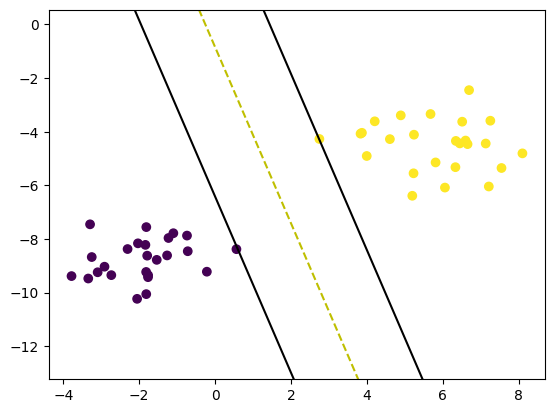

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)

print(clf.weights, clf.b)

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o', c=y)
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])
    
    x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.b, 0)
    
    x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.b, -1)
    
    x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.b, 1)
    
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')
    
    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3, x1_max+3])
    
    plt.show()

visualize_svm()    